In [9]:
#if you need to install scikit-maad
!pip install scikit-maad

from maad import sound, util, rois
import matplotlib.pyplot as plt

import numpy as np
from scipy.io import wavfile
from scipy.signal import resample_poly, find_peaks
import os

(array([0.78854456, 0.78821283, 0.78869997, ..., 0.73176862, 0.73172022,
        0.7301365 ], shape=(2118,)),
    peak_time  xcorrcoef    min_t    max_t  min_f       max_f
 0     6.3616   0.799937   5.6704   7.0528    0.0  19960.9375
 1    18.5344   0.795579  17.8432  19.2256    0.0  19960.9375
 2    22.8608   0.795248  22.1696  23.5520    0.0  19960.9375)

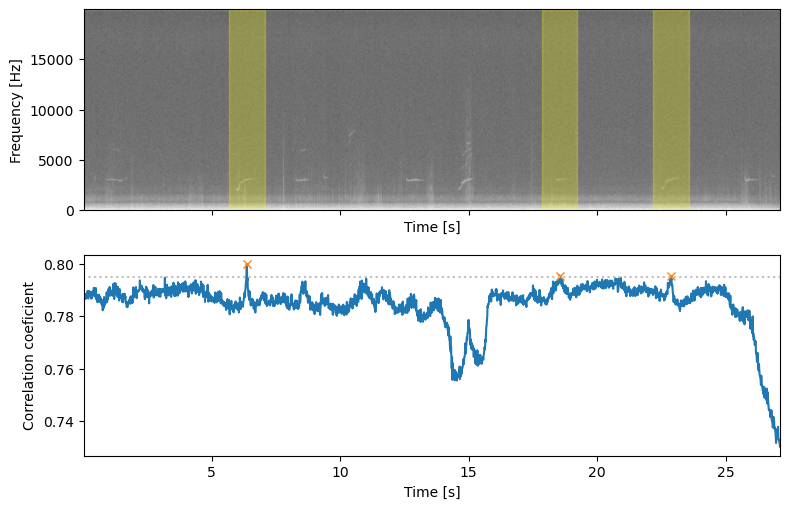

In [10]:
#BASIC SPECTROGRAM CROSS CORR

adj = 5

# load wav file and downsample
s, fs = sound.load("whistle_ex_2.wav")
#sample rate in fs_ds
fs_ds = 40000
s_ds = resample_poly(s, up=1, down=fs//fs_ds)
#s_filt = sound.select_bandwidth(s, fs, fcut=(7000, 15000), forder=5, ftype='bandpass')
Sxx_target, tn_target, fn_target, ext_target = sound.spectrogram(s_ds, fs_ds, nperseg=1024, noverlap=512)

Sxx_target_dB = util.power2dB(Sxx_target) + adj


s, fs = sound.load("whistle_template_2.wav")
fs_ds = 40000
s_ds = resample_poly(s, up=1, down=fs//fs_ds)
Sxx_template, tn_template, fn_template, ext_template = sound.spectrogram(s_ds, fs_ds, nperseg=1024, noverlap=512)

Sxx_template_dB = util.power2dB(Sxx_template) + adj


rois.template_matching(Sxx_target_dB, Sxx_template_dB, 
                       tn_target, ext_target, 
                       peak_th = 0.795,
                       display=True)

(array([0.06124538, 0.06683402, 0.05591342, ..., 0.06996542, 0.06999573,
        0.07585334], shape=(2118,)),
     peak_time  xcorrcoef    min_t    max_t  min_f       max_f
 0      1.0240   0.225904   0.3328   1.7152    0.0  19960.9375
 1      1.1520   0.228099   0.4608   1.8432    0.0  19960.9375
 2      1.2160   0.244819   0.5248   1.9072    0.0  19960.9375
 3      6.3488   0.334112   5.6576   7.0400    0.0  19960.9375
 4      6.4640   0.212536   5.7728   7.1552    0.0  19960.9375
 5      8.4608   0.218540   7.7696   9.1520    0.0  19960.9375
 6      8.4864   0.244695   7.7952   9.1776    0.0  19960.9375
 7      8.5248   0.248677   7.8336   9.2160    0.0  19960.9375
 8      8.5760   0.240595   7.8848   9.2672    0.0  19960.9375
 9      8.6016   0.239366   7.9104   9.2928    0.0  19960.9375
 10     8.6400   0.238063   7.9488   9.3312    0.0  19960.9375
 11    12.6976   0.210365  12.0064  13.3888    0.0  19960.9375
 12    12.7488   0.238716  12.0576  13.4400    0.0  19960.9375
 13    1

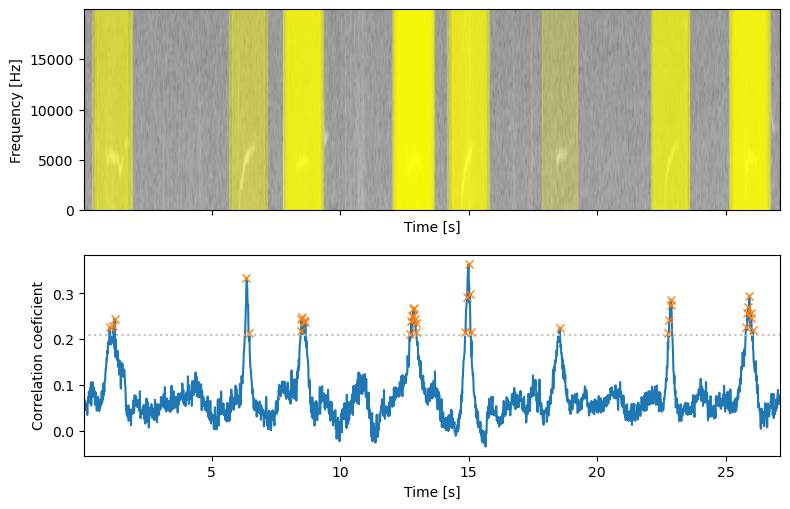

In [11]:
# Suppose Sxx_target, fn_target, etc. are already computed
freq_mask = (fn_target >= 2500) & (fn_target <= 4500)
Sxx_target_band = Sxx_target[freq_mask, :]
fn_target_band = fn_target[freq_mask]

Sxx_target_dB = util.power2dB(Sxx_target_band) + adj

# Similarly for template
Sxx_template_band = Sxx_template[freq_mask, :]
fn_template_band = fn_template[freq_mask]

Sxx_template_dB = util.power2dB(Sxx_template_band) + adj

# Run template matching
rois.template_matching(
    Sxx_target_dB, Sxx_template_dB,
    tn_target, ext_target,
    peak_th=0.21,
    display=True
)

In [13]:
print(os.getcwd())

/home/jovyan/ohw25_proj_RiptideRemix/contributor_folders/mattie


In [14]:
#BOWHEAD 

adj = 10

# load wav file and downsample
s, fs = sound.load("bowhead_target.wav")
Sxx_target, tn_target, fn_target, ext_target = sound.spectrogram(s, fs, nperseg=1024, noverlap=512)

Sxx_target_dB = util.power2dB(Sxx_target) + adj


s, fs = sound.load("bowhead_template.wav")
Sxx_template, tn_template, fn_template, ext_template = sound.spectrogram(s, fs, nperseg=1024, noverlap=512)

Sxx_template_dB = util.power2dB(Sxx_template) + adj


xcorrcoef, _  = rois.template_matching(Sxx_target_dB, Sxx_template_dB, 
                       tn_target, ext_target, 
                       peak_th = None,
                       display=False)

In [15]:
peaks, properties = find_peaks(xcorrcoef, prominence=0.2)  # adjust as needed

peak_times = tn_target[peaks]

print("Detected peaks at times:", peak_times)

Detected peaks at times: [14.65 20.7  27.4  39.25 74.35 80.45 86.9  92.5  98.55]


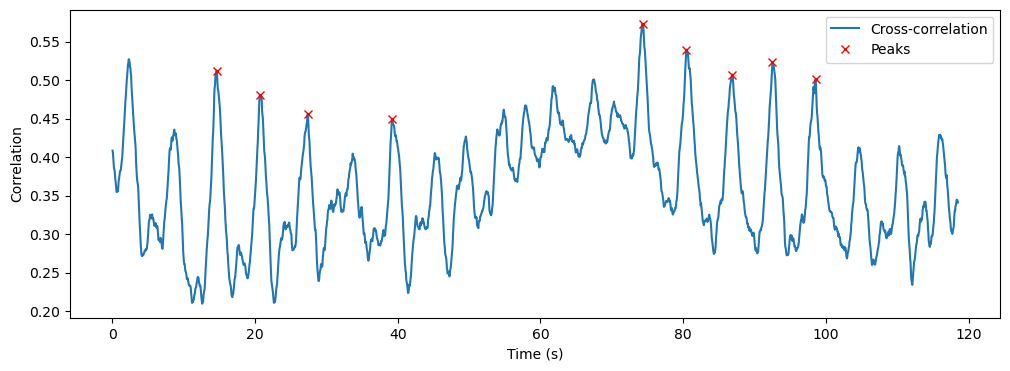

In [16]:
plt.figure(figsize=(12,4))
plt.plot(tn_target, xcorrcoef, label='Cross-correlation')
plt.plot(tn_target[peaks], xcorrcoef[peaks], 'rx', label='Peaks')
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
plt.legend()
plt.show()

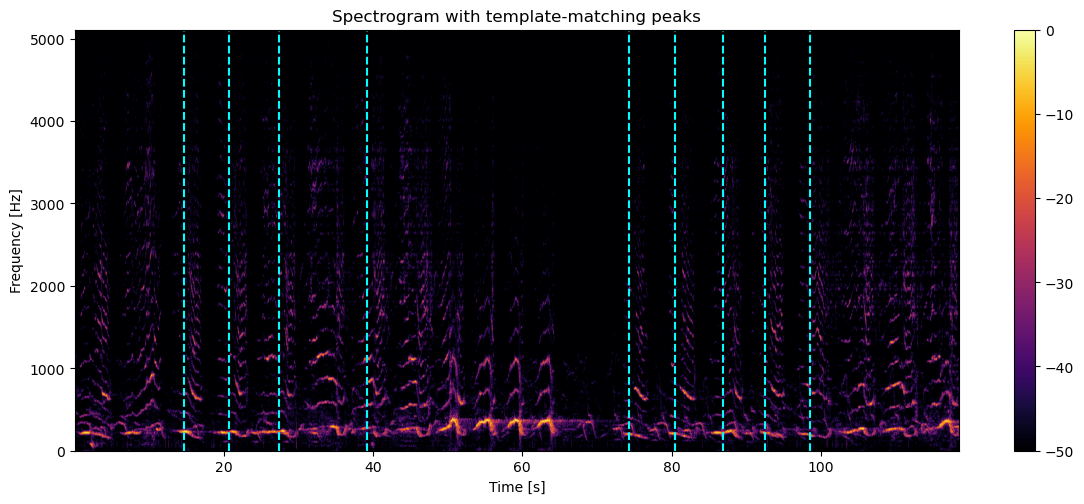

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
util.plot2d(Sxx_target_dB, extent=ext_target, ax=ax, cmap='inferno', vmin=-50, vmax=0)
ax.set_title("Spectrogram with template-matching peaks")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Frequency [Hz]")

# Overlay vertical lines at detected peaks
for t in peak_times:
    ax.axvline(t, color='cyan', linestyle='--', linewidth=1.5)

plt.show()

In [72]:
# original waveform and sampling rate

clip_duration = 5
half_clip = clip_duration / 2

s, fs = sound.load("ohw25_proj_RiptideRemix/contributor_folders/mattie/bowhead_target.wav")

# folder to save clips
#os.makedirs("ohw25_proj_RiptideRemix/contributor_folders/mattie/roi_clips", exist_ok=True)

min_t = peak_times[1] - half_clip
max_t = peak_times[1] + half_clip

sliced = sound.trim(s, fs, min_t = min_t, max_t = max_t)

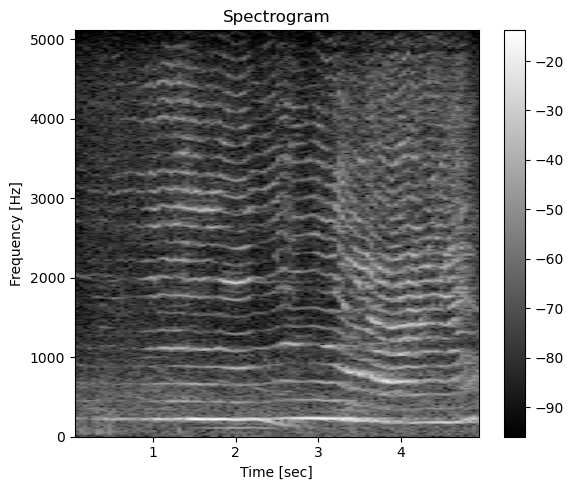

In [73]:
_ = sound.spectrogram(sliced, fs, display=True, figsize=(4,6))

In [74]:
sound.write('ohw25_proj_RiptideRemix/contributor_folders/mattie/roi_clips/bowhead_clip.wav', 
            fs, sliced, bit_depth=16)